# Introduction to Regression with Neural Network in TensorFlow

There are many definitions for a regression problem but for simplicity: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.14.0


## Creating data to view and fit

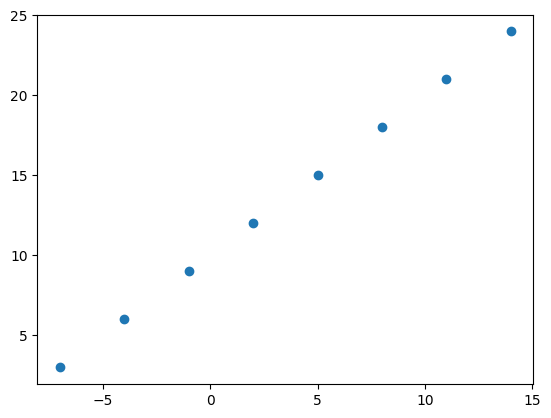

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [4]:
# Create a demo tensor for out housing price prediction problem
house_infor = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_infor, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
# Turn our numpy array into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

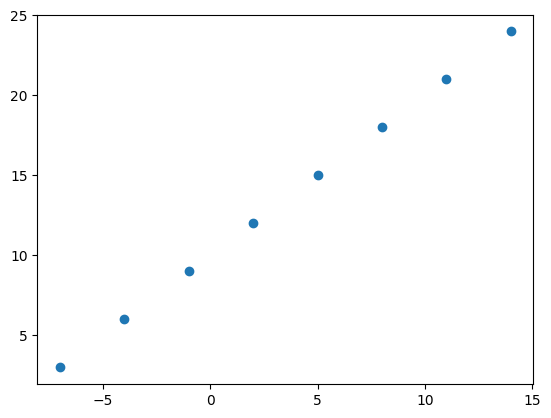

In [9]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a mode**l - define the loss function (in other words, the function which tells out model how wrong it is) and the optimizer (tells our model how to imporve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and lables).

In [10]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. complie the model
model.compile(loss = tf.keras.losses.mae,           # mae: mean absolute error
              optimizer=tf.keras.optimizers.SGD(),  # SGD: stochastic gradient descent
              metrics = ["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 627ms/step - loss: 13.7064 - mae: 13.7064
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 13.5739 - mae: 13.5739
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 13.4414 - mae: 13.4414
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 13.3089 - mae: 13.3089
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 13.1764 - mae: 13.1764


In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 138ms/step


array([[2.0224657]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.
1. **Creating a model**: Here, we might add more layers, increase the number of hiddent units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compliling a model**: here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model**: here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [13]:
# let's rebuit our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics = ["mae"])

# 3. Fit our model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 554ms/step - loss: 15.8908 - mae: 15.8908
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 15.8848 - mae: 15.8848
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 15.8788 - mae: 15.8788
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 15.8728 - mae: 15.8728
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 15.8668 - mae: 15.8668
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 15.8608 - mae: 15.8608
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 15.8548 - mae: 15.8548
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 15.8488 - mae: 15.8488
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 15.8428 - mae: 15.8428
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 15.8368 - mae: 15.8368
Epoch 11/100
1/1 [==============================] 

In [14]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Let's see if out model's prediction has improved...
model.predict([17])

1/1 [==============================] - 0s 130ms/step


array([[-8.370267]], dtype=float32)

In [16]:
# Let's see if we can make another change to improve our model

#1. Create the model (this time with extra hidden layer with 100 neurons)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.7246 - mae: 12.7246
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 12.1249 - mae: 12.1249
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 11.5202 - mae: 11.5202
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 10.8950 - mae: 10.8950
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 10.2492 - mae: 10.2492
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 9.5739 - mae: 9.5739
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 8.8688 - mae: 8.8688
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 8.1214 - mae: 8.1214
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 7.3230 - mae: 7.3230
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 6.4685 - mae: 6.4685
Epoch 11/100
1/1 [==============================] - 0s 27ms/s

In [17]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
model.predict([17])

1/1 [==============================] - 0s 263ms/step


array([[32.402325]], dtype=float32)

### Common ways to improve a deep model:
- Adding layers
- Increase the number of hidden units
- Change activation functions
- Change the optimization function
- Change the learning rate (most important)
- Fitting more data
- Fitting for longer (epochs)

## Evaluating a model

In practice, a typical workflow you'll through when building neral network is:
...
Build -> fit -> evaluate -> tweak -> fit -> evaluate -> tweak -> fit -> ...

When it comes to evaluation... there are 3 words you should memorise:

"Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - whay data are we working with
* The model
* The training of a model
* The prediction of the model


In [19]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

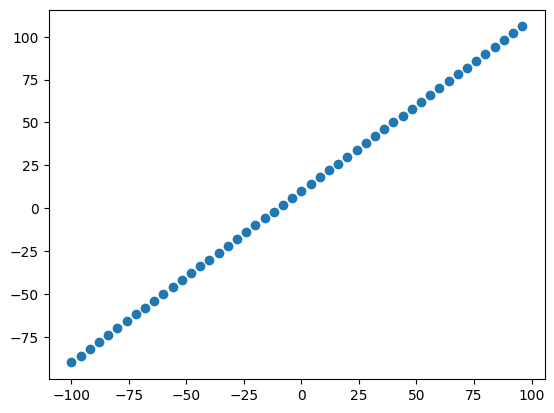

In [21]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets
* **Training set** - model learns from this data 70 - 80% of the data available
* **Validation set** - the model gets tuned on this data, which is 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has learned, 10-15% of the total data available

In [22]:
# Check the length of how many samples we have
len(X)

50

In [23]:
# Split the data into train and test sets
X_train = X[:40] # first 40 training samples
y_train = y[:40]
X_test = X[40:] #last 10 are testing samples
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

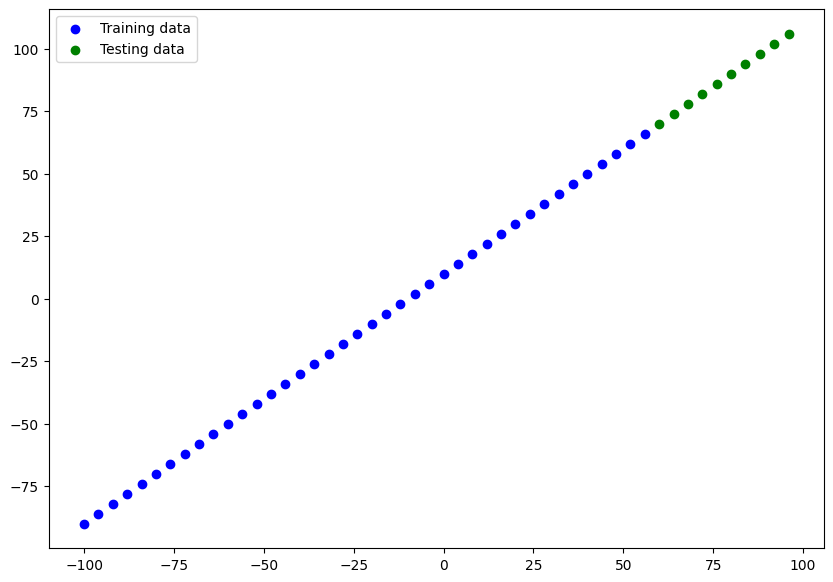

In [24]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
#Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
#Show a legend
plt.legend();

In [25]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [26]:
#model.summmary()

In [27]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "first_model")

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [28]:
model.summary()

Model: "first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - params the model can update as it trains.
* Non_trainable params - params aren't updated during training (apply params from trained model in transfer learning)

In [29]:
# Let's fit our model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [30]:
model.summary()

Model: "first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


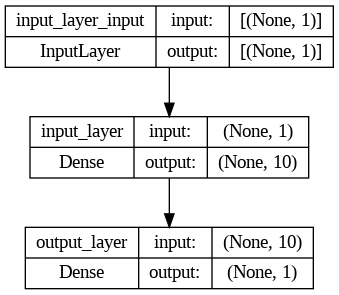

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model prediction

To visualize predictions, it's a good idea to plot them againts the ground truth labels.

Often you'll see this in the form of 'y_test' or 'y_true' vs 'y_pred'

In [32]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 82ms/step


array([[34.866108],
       [37.09477 ],
       [39.323433],
       [41.55209 ],
       [43.78075 ],
       [46.00941 ],
       [48.23807 ],
       [50.466732],
       [52.695385],
       [54.924053]], dtype=float32)

In [33]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note**: if you feel like you want to reuse some kind of funtionality, let's build a function

In [34]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     prediction=y_pred):
  """
  Plots training data, test data, compares prediction to ground truth
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data, train_label, c="b", label = "Training data")
  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label = "Testing data")
  #Plot model's prediction in red
  plt.scatter(test_data,prediction, c="r", label = "Prediction")
  #Show the legend
  plt.legend();

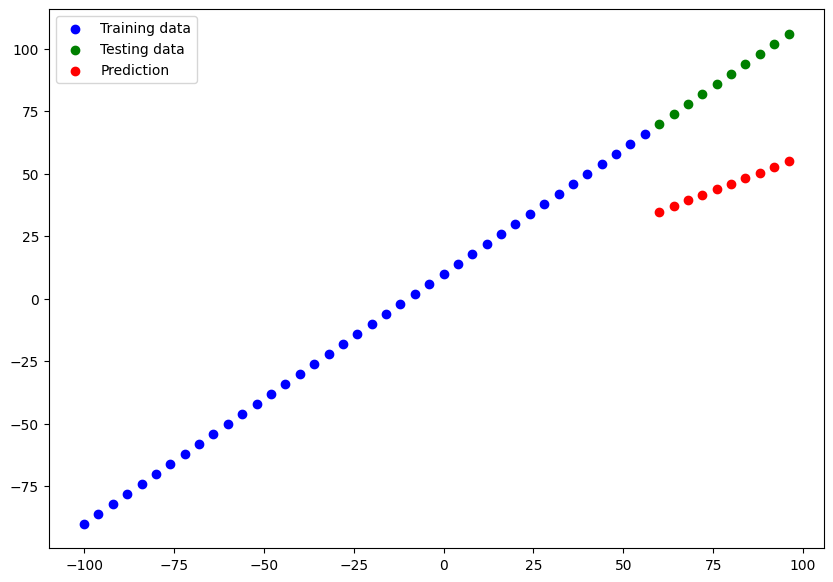

In [35]:
plot_predictions(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 prediction=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there'll be different evaluation metrics to evaluate your models performance.

Since we're working on a regression, two of the main metrics:
* MAE: mean absolute error, on average, how wrong is each of my model predictions
* MSE: mean square error, "square the average errors"

In [36]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 269ms/step - loss: 43.1049 - mae: 43.1049


[43.10491943359375, 43.10491943359375]

In [37]:
# Calculate mean absolute error
tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=y_pred)


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.133892, 50.90523 , 48.676567, 46.44791 , 44.21925 , 41.99059 ,
       39.76193 , 37.533268, 35.304615, 33.075947], dtype=float32)>

In [38]:
y_test, y_pred, tf.constant(y_pred)
#y_test and y_pred are in different dimensions

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[34.866108],
        [37.09477 ],
        [39.323433],
        [41.55209 ],
        [43.78075 ],
        [46.00941 ],
        [48.23807 ],
        [50.466732],
        [52.695385],
        [54.924053]], dtype=float32),
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[34.866108],
        [37.09477 ],
        [39.323433],
        [41.55209 ],
        [43.78075 ],
        [46.00941 ],
        [48.23807 ],
        [50.466732],
        [52.695385],
        [54.924053]], dtype=float32)>)

In [39]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.866108, 37.09477 , 39.323433, 41.55209 , 43.78075 , 46.00941 ,
       48.23807 , 50.466732, 52.695385, 54.924053], dtype=float32)>

In [40]:
# Calculate mae
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=43.10492>

In [41]:
# Calculare mse
mse = tf.keras.losses.MSE(y_true=y_test,
                          y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1883.9197>

In [42]:
# Make some functions to resuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))


In [43]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

### Running experiments to improve our model
'''
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it
'''

1. Get more data - get more examples to model to train on (more opportunitites to learn patterns)
2. Make your model larger (using a more complex model) - more layers, more hidden units in each layer.
3. Train for longer

Let's do 3 modelling experiments:
1. 'model_1' - same as original model, 1 layer, trained for 100 epochs
2. 'model_2' - 2 layers, trained for 100 epochs
3. 'model_3' - 2 layers, trained for 500 epochs

**Build model_1**

In [44]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 47ms/step - loss: 50.3035 - mae: 50.3035
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 17.5029 - mae: 17.5029
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 16.7738 - mae: 16.7738
Epoch 4/100
2/2 [==============================] - 0s 21ms/step - loss: 9.0535 - mae: 9.0535
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 11.0791 - mae: 11.0791
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 10.2340 - mae: 10.2340
Epoch 7/100
2/2 [==============================] - 0s 23ms/step - loss: 9.2438 - mae: 9.2438
Epoch 8/100
2/2 [==============================] - 0s 17ms/step - loss: 9.1689 - mae: 9.1689
Epoch 9/100
2/2 [==============================] - 0s 18ms/step - loss: 11.7958 - mae: 11.7958
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 13.7233 - mae: 13.7233
Epoch 11/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 167ms/step


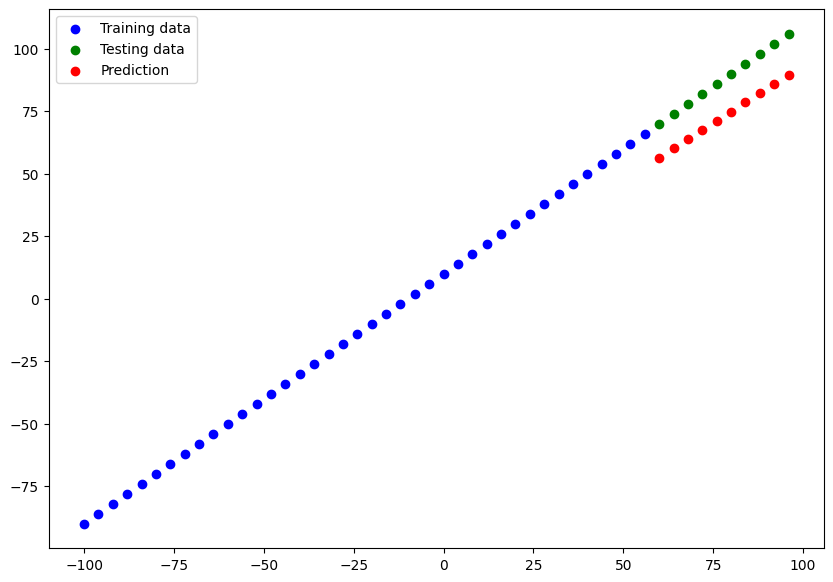

In [45]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(prediction=y_preds_1)

In [46]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.933878>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.86133>)

**Build model_2**
2 layers, trained for 100 epochs

In [47]:
# Set the random seed
tf.random.set_seed(42)

# 1. Build a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 2s 35ms/step - loss: 41.9265 - mse: 2435.6709
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 31.7997 - mse: 1334.7749
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 36.1116 - mse: 1990.6432
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 30.7798 - mse: 1404.8489
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 15.6617 - mse: 317.8051
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 12.4240 - mse: 196.7601
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 11.7043 - mse: 168.4674
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 12.1014 - mse: 200.6914
Epoch 9/100
2/2 [==============================] - 0s 24ms/step - loss: 37.9475 - mse: 2222.5286
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 25.5446 - mse: 916.1191
Epoch 11/100
2/2 [================

1/1 [==============================] - 0s 191ms/step


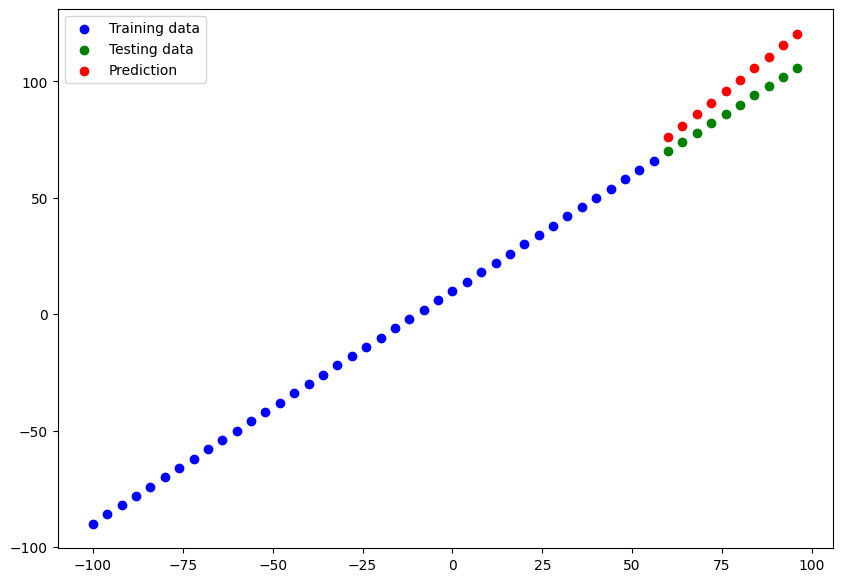

In [48]:
# Make and plot prediction for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(prediction=y_preds_2)

In [49]:
# Calculate model_2 evaluation metric
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.225961>,
 <tf.Tensor: shape=(), dtype=float32, numpy=111.97966>)

**Build model_3**

* 2 layers, trained for 500 epochs

In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)


Epoch 1/500
2/2 [==============================] - 2s 15ms/step - loss: 48.3173 - mse: 3446.6653
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 31.3390 - mse: 1311.1443
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 36.2144 - mse: 1978.4174
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 28.1272 - mse: 1160.3237
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 15.3000 - mse: 298.1759
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 12.1566 - mse: 181.9334
Epoch 7/500
2/2 [==============================] - 0s 21ms/step - loss: 11.4660 - mse: 159.9532
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 11.2143 - mse: 174.5409
Epoch 9/500
2/2 [==============================] - 0s 18ms/step - loss: 41.8466 - mse: 2791.2842
Epoch 10/500
2/2 [==============================] - 0s 13ms/step - loss: 29.0640 - mse: 1194.2009
Epoch 11/500
2/2 [====================

1/1 [==============================] - 0s 50ms/step


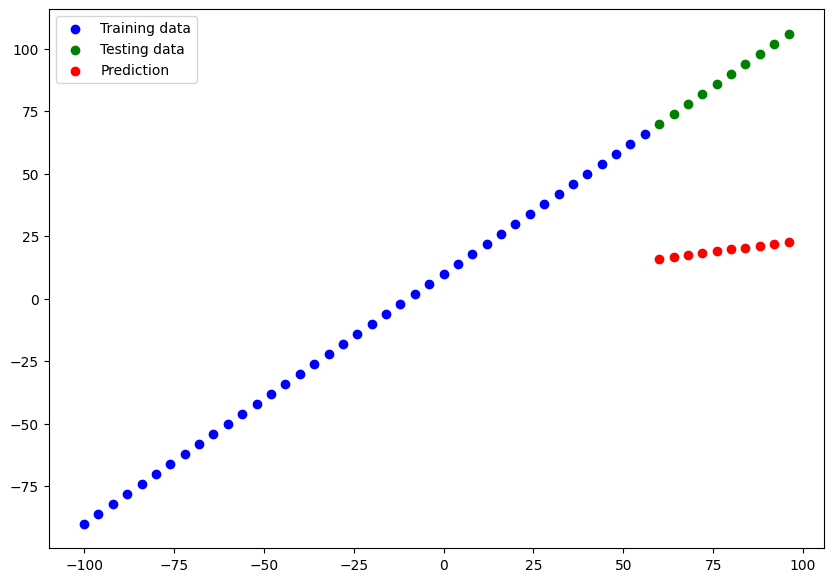

In [51]:
# Make prediction and plot
y_preds_3 = model_3.predict(X_test)
plot_predictions(prediction=y_preds_3)

In [52]:
# Evaluation the model
mae_3 = mae(y_true=y_test, y_pred=y_preds_3)
mse_3 = mse(y_true=y_test, y_pred=y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.665886>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4801.4014>)

**Note**: start with small experiments (small models) and make sure they work, then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare it together

In [53]:
# Let's compare our model;s results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.933878,223.861328
1,model_2,10.225961,111.979660
2,model_3,68.665886,4801.401367


It's look like model 2 perform best

In [54]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Note**: one of your main goals should be to minimize the time between your experiment. The more experiments you do, the more things you'll figure out.

## Tracking your expermiments

One really good habit in machine learning modeling is to track the resutls of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:
*TensorBoard: track modelling experiments
*Weights & Bias: all kinds of machine learning experiments


## Saving our models

Saving our models allow us to use them outside of Google Collab

There are two main formats:
1. The SavedModel format
2. The HDF5 format

In [55]:
# Save model using SavedModel format
model_2.save("best_model_SavedModel_format")

In [56]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model

In [57]:
# Load in the SavedModel foramt model
load_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
load_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Compare model 2 prediction to SavedModel format prediction
model_2_preds = model_2.predict(X_test)
load_SavedModel_format_preds = load_SavedModel_format.predict(X_test)
model_2_preds == load_SavedModel_format_preds

1/1 [==============================] - 0s 51ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [59]:
# Compare mae
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=load_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [60]:
# Loadin model in .h5 format
load_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
load_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
# Check to see if loaded .h5 model match model 2
model_2_preds = model_2.predict(X_test)
load_h5_model_preds = load_h5_model.predict(X_test)
model_2_preds == load_h5_model_preds


1/1 [==============================] - 0s 57ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:
1. Files tab -> right click -> download
2. Use code (see the cell below)
3. Save it to Google drive by connecting Google Drive and copying it there

In [62]:
# Download a file from Google colab
from google.colab import files
files.download("/content/model.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Save a file from Google colab to Google Drive
!cp /content/model.png /content/drive/MyDrive/TensorFlow_course

In [63]:
!ls /content/drive/MyDrive/TensorFlow_course

model.png


## A larger example

In [64]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
# Let's try one-hot encode our dataframe
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [67]:
# Create x & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [68]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [69]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [70]:
!pip uninstall sklearn -y
!pip install Cython
!pip install https://github.com/Santosh-Gupta/scikit-learn/archive/master.zip

     | 6.6 MB 12.6 MB/s 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [71]:
# Creat training and test sets
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [72]:
# Build a neural network (sort of like model 2 above)
tf.random.set_seed(42)
# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# 3. Fit a model
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 13175.9971 - mae: 13175.9971
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 12259.6836 - mae: 12259.6836
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12168.0322 - mae: 12168.0322
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12091.1104 - mae: 12091.1104
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 11972.6836 - mae: 11972.6836
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 11778.3740 - mae: 11778.3740
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 11439.8154 - mae: 11439.8154
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 10915.3584 - mae: 10915.3584
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 10296.7832 - mae: 10296.7832
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 9654.100

In [73]:
# Check the result of insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8961.3975 - mae: 8961.3975


[8961.3974609375, 8961.3974609375]

In [74]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Our model isn't performing well, let's try and improve it!

To (try) improve our model we'll run 2 experiments
1. Add an extra layer with more hidden units
2. Train for longer
3. (insert your own experiment here)

In [79]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# 3. Fit the model
insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 4s 11ms/step - loss: 13335.8115 - mae: 13335.8115
Epoch 2/100
34/34 [==============================] - 0s 9ms/step - loss: 13312.4785 - mae: 13312.4785
Epoch 3/100
34/34 [==============================] - 0s 8ms/step - loss: 13268.9531 - mae: 13268.9531
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 13188.6943 - mae: 13188.6943
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 13055.1143 - mae: 13055.1143
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 12858.9131 - mae: 12858.9131
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12613.9609 - mae: 12613.9609
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 12359.3818 - mae: 12359.3818
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 12174.8623 - mae: 12174.8623
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 12110.5

In [81]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8627.9346 - mae: 8627.9346


[8627.9345703125, 8627.9345703125]

In [84]:
# set random seed
tf.random.set_seed(42)
# 1. Creat a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
history=insurance_model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13340.4072 - mae: 13340.4072
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13319.2285 - mae: 13319.2285
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13279.9541 - mae: 13279.9541
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13206.9482 - mae: 13206.9482
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13083.7158 - mae: 13083.7158
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 12897.8252 - mae: 12897.8252
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12657.4707 - mae: 12657.4707
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12397.9053 - mae: 12397.9053
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12192.1768 - mae: 12192.1768
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 12111.02

In [85]:
# Evaluate
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8632.6152 - mae: 8632.6152


[8632.615234375, 8632.615234375]

Text(0.5, 0, 'epochs')

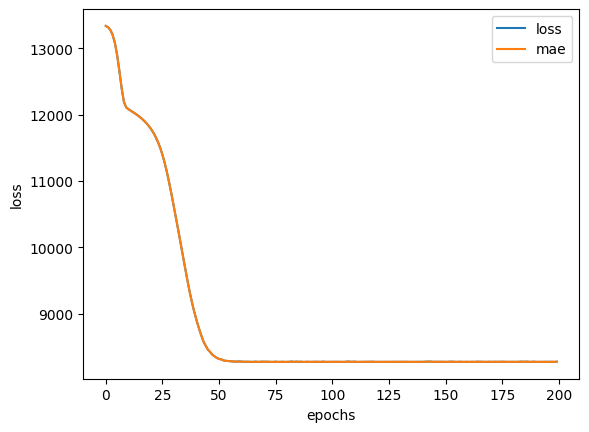

In [86]:
# Plot history (loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** How long should you train for?

It depends on the problem you're working on. TensorFlow has a solution! It's called the EarlyStopping Callback, which is a tensorflow component you can add to your model to strop training once it stops improving in certain metrics.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which perform better

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow few classes from Scikit-Learn

In [93]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [94]:
# What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [97]:
X_train_normal[19]

array([0.73913043, 0.69518429, 0.4       , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        ])

In [98]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalize and one hot encoded. Now let's build a neural network model.

In [106]:
# Build neural network model to fit on our normalized data
tf.random.set_seed(42)
# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 3s 4ms/step - loss: 13311.0215 - mae: 13311.0215
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 12768.9922 - mae: 12768.9922
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 10686.6377 - mae: 10686.6377
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 8722.3584 - mae: 8722.3584
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 8515.8096 - mae: 8515.8096
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 8434.5625 - mae: 8434.5625
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8370.4238 - mae: 8370.4238
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 8332.0781 - mae: 8332.0781
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 8311.9316 - mae: 8311.9316
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 8298.2373 - mae: 829

In [113]:
# Evaluate insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8640.3115 - mae: 8640.3115


[8640.3115234375, 8640.3115234375]